# Flight Price Prediction

Description: This dataset comprises two sets - Train set and Test set. The Different features which will help to predict the flight price. Here we are provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
    The flight price is something that is completely unpredictable. Using the Data analysis skills here we'll be predicting the flight price by performing different models taking price as target variable. It is an regression problem where given a set of features and we need to predict the price of ticket from one city to another.



# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Train Dataset

In [204]:
train=pd.read_csv("flight_Train.csv")

In [205]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [206]:
train.shape

(10683, 11)

In [207]:
pd.set_option('display.max_columns', None) #to display all the columns

In [208]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [209]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [210]:
train.info() #prints all information of DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Here we can see that in flight train dataset there are total 11 columns and 10683 rows. In this dataset the target variable is Price.
Here all variables except target variable all are in object type. We can also analyse there are few null values present in only 2 columns.

In [211]:
#Checking null values

In [212]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Thus we can verify that 2 null values are present; 1 in column 'Total_Stops' and 1 in 'Route' column. We'll work on it to remove it.

In [213]:
#Treating Null Values - As only 2 values are not present in 2 columns thus we can drop those rows.

In [214]:
train.dropna(inplace = True)

In [215]:
#rechecking null values

In [216]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Thus no null values present now

In [217]:
#checking unique values

In [218]:
print(train['Source'].unique())
train['Destination'].unique()

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

# EDA

For categorical columns we'll perform countplot to analyse the visualization

In [219]:
#checking of airlines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

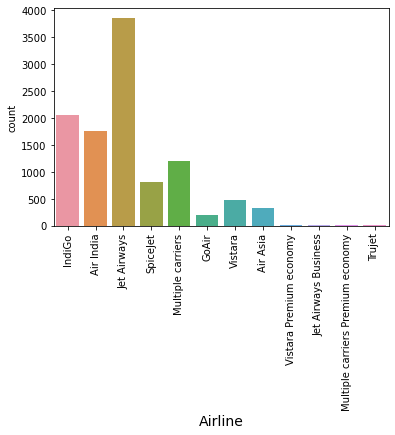

In [220]:
plt.figure(figsize=(6,4))
sns.countplot(x='Airline', data=train)
plt.xlabel('Airline', fontsize=14)
plt.xticks(rotation=90)

Here we can see that there are Jet Airways have more number of flights.After this Indigo and Air India.
Least no. of flights are Trujet, Multiple carrier Premium Economy, Jet Airways Business, Vistara Premium

In [221]:
#checking of 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

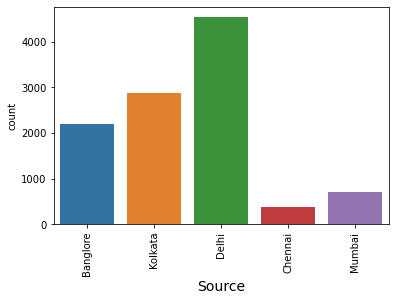

In [222]:
plt.figure(figsize=(6,4))
sns.countplot(x='Source', data=train)
plt.xlabel('Source', fontsize=14)
plt.xticks(rotation=90)

Here we can see that no. of flights are maximum in Delhi city then Kolkata. Least no. is in Chennai

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

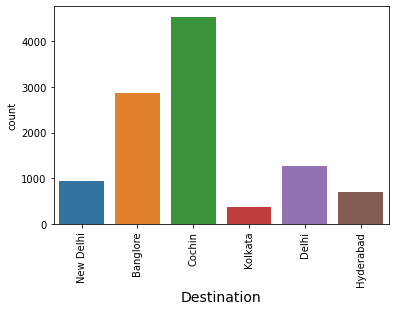

In [223]:
plt.figure(figsize=(6,4))
sns.countplot(x='Destination', data=train)
plt.xlabel('Destination', fontsize=14)
plt.xticks(rotation=90)

From above graph we can see that cochin as destination have max and Kolkata as min no. of flights.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

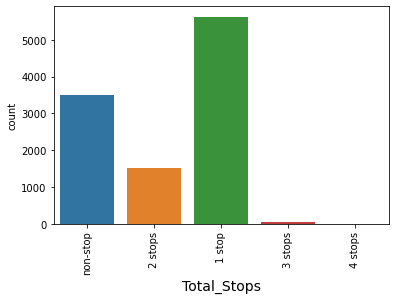

In [224]:
plt.figure(figsize=(6,4))
sns.countplot(x='Total_Stops', data=train)
plt.xlabel('Total_Stops', fontsize=14)
plt.xticks(rotation=90)

Here we can see that 1stop has max no. of flights and 4 stops has no flights and 3 stops has least number of flights.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

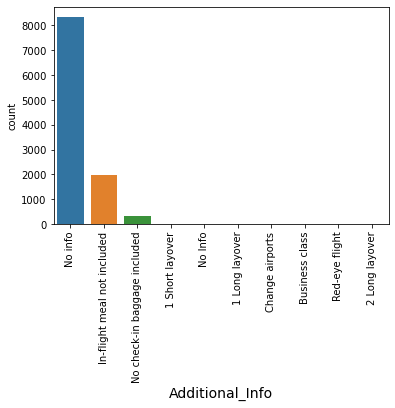

In [225]:
plt.figure(figsize=(6,4))
sns.countplot(x='Additional_Info', data=train)
plt.xlabel('Additional_Info', fontsize=14)
plt.xticks(rotation=90)

Here we can see that maximum no. of flights have no info. Least no. of flights have additional info'inflight meal not included'

In [226]:
train


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Data Preprocessing

Working on all columns to convert it in numerics

In [227]:
#Date_of_journey
train["Journey_day"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month
train.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [228]:
# Dep_Time
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [229]:
# Arrival_Time
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [230]:
#Duration
train['Duration']=train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
#now lets convert this column into a numeric
train['Duration']=pd.to_numeric(train['Duration'])

In [231]:
from sklearn.preprocessing import LabelEncoder
columns = ['Airline','Source','Destination']
le = LabelEncoder()
for i in columns:
    train[i] = le.fit_transform(train[i])



In [232]:
#Route
train.drop(["Route"], axis = 1, inplace = True)

In [233]:
train.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,non-stop,No info,3897,24,3,22,20,1,10
1,1,3,0,445,2 stops,No info,7662,1,5,5,50,13,15
2,4,2,1,1140,2 stops,No info,13882,9,6,9,25,4,25
3,3,3,0,325,1 stop,No info,6218,12,5,18,5,23,30
4,3,0,5,285,1 stop,No info,13302,1,3,16,50,21,35


In [234]:
#Total Stops
train["Total_Stops"].value_counts() #checking counts of unique values

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [235]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [236]:
#Additional_info
train.drop(["Additional_Info"], axis = 1, inplace = True)

In [237]:
train.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,0,3897,24,3,22,20,1,10
1,1,3,0,445,2,7662,1,5,5,50,13,15
2,4,2,1,1140,2,13882,9,6,9,25,4,25
3,3,3,0,325,1,6218,12,5,18,5,23,30
4,3,0,5,285,1,13302,1,3,16,50,21,35


In [238]:
#checking Duration relationship with Price

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

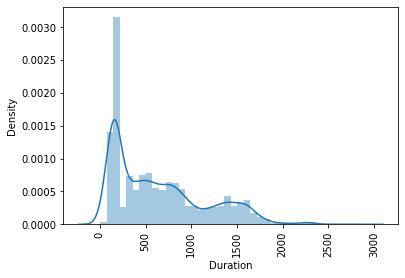

In [239]:
plot=plt.figure()
sns.distplot(train['Duration'],bins=40)
plt.xticks(rotation=90)

Here we can observe that some part of duration data is going out of normal graph thus there can be some outliers present

# Checking Correlation with Target Variable

In [240]:
train.corr()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.013397,0.018446,-0.159651,-0.199396,-0.039565,0.026137,0.024674,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,0.161886,0.192840,0.015999,0.004902,0.183268,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,-0.257352,-0.295476,-0.071122,-0.041025,-0.364682,-0.072997,0.127931,-0.039729,0.017196
Duration,-0.159651,0.161886,-0.257352,1.000000,0.738071,0.506480,-0.022439,0.014836,0.002088,-0.019099,0.051531,-0.069663
Total_Stops,-0.199396,0.192840,-0.295476,0.738071,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940
Price,-0.039565,0.015999,-0.071122,0.506480,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155
Journey_day,0.026137,0.004902,-0.041025,-0.022439,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510
Journey_month,0.024674,0.183268,-0.364682,0.014836,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626
Dep_hour,-0.035269,0.059047,-0.072997,0.002088,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911
Dep_min,-0.059922,-0.056998,0.127931,-0.019099,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597


<AxesSubplot:>

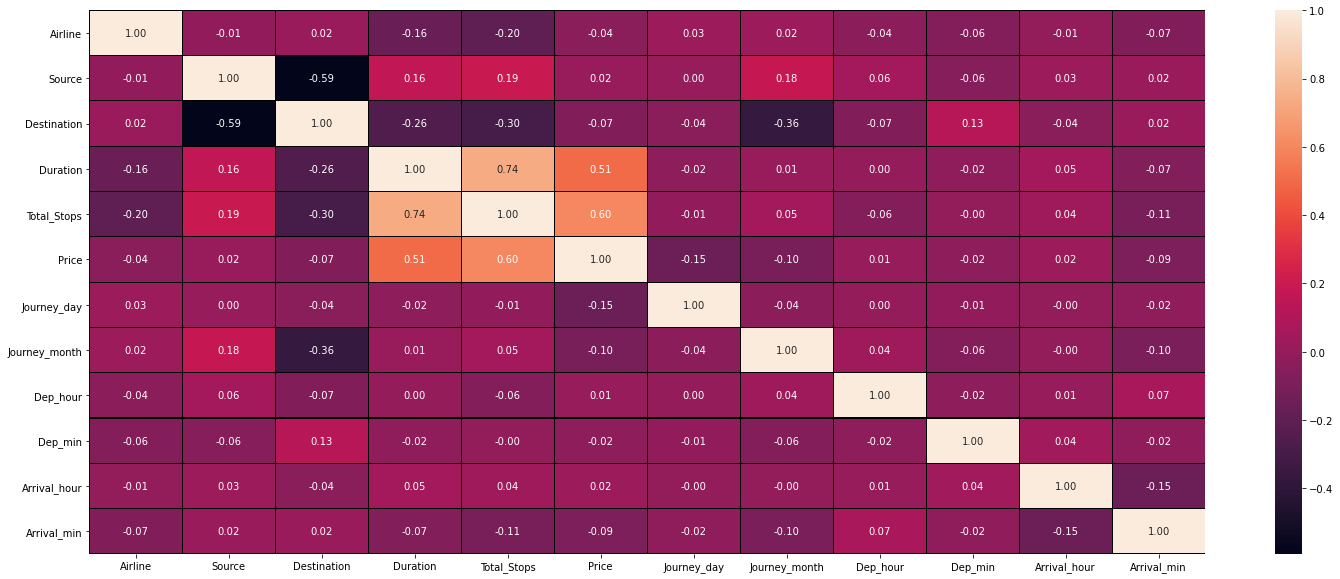

In [241]:
plt.figure(figsize=(25,10))
sns.heatmap(train.corr(),annot=True,linewidths=.1,linecolor='black',fmt='.2f')

Thus from above heatmap graph we can relate to independant variables to target variable 'Price'. Here we can see that 'Duration', 'Total Stops' and 'Airline_Jet Airways' are positively correlated to target variable.


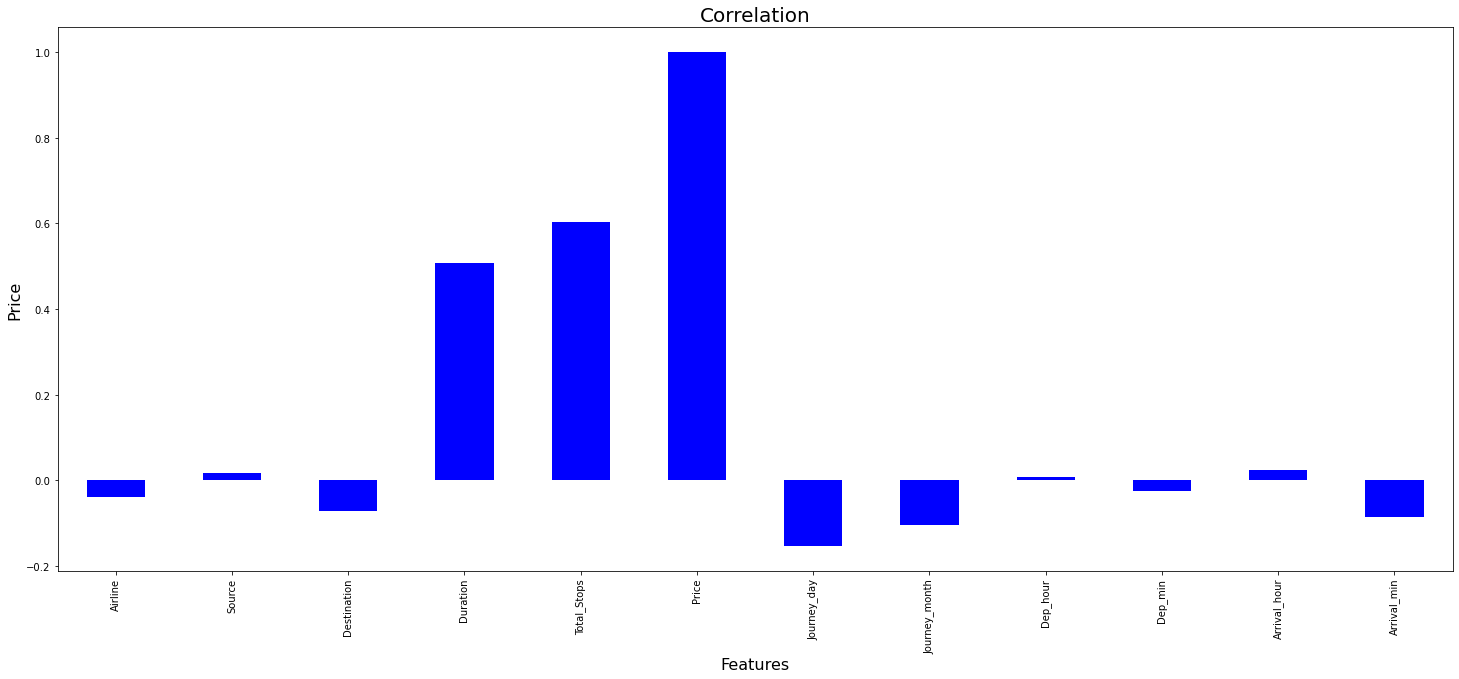

In [242]:
plt.figure(figsize=(25,10))
train.corr()['Price'].plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.title('Correlation',fontsize=20)
plt.show()


Here we can say that 'Duration', 'Total Stops' are positively correlated to target variable.
'journey_time','Airline', 'Airline' and 'Destination' are showing highly negative correlation

# Spilitting in X and Y

In [243]:
x=train.drop('Price',axis=1)

In [244]:
y=train['Price']

In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Model Building

RandomForestRegressor

In [246]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [247]:
y_pred = rfr.predict(x_test)

In [248]:
rfr.score(x_train, y_train)

0.9526960140293129

RandomForestRegressor score = 96%

In [249]:
from sklearn import metrics

In [250]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', (metrics.r2_score(y_test, y_pred)))

MAE: 1179.8872089276865
MSE: 4287138.052273875
RMSE: 2070.5405217657235
r2_score: 0.8011721151349633


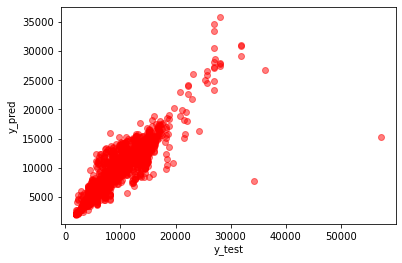

In [266]:

plt.scatter(y_test,y_pred,alpha =0.5,color="r")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

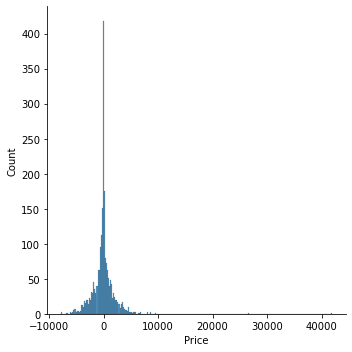

In [267]:
sns.displot(y_test-y_pred)
plt.show()

Thus, we can say that from model RandomForestRegressor we are accuracy of 96%
r2_score = 80%

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

Linear Regression

In [ ]:
LR=LinearRegression()
LR.fit(x_train,y_train)

In [ ]:
y_pred = LR.predict(x_test)

In [ ]:
LR.score(x_train, y_train)

Thus, we can say that from model LinearRegression we are accuracy of 62%

Decision Tree Regressor

In [ ]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

In [ ]:
y_pred = DTR.predict(x_test)

In [ ]:
DTR.score(x_train, y_train)

Thus, we can say that from model DecisionTreeRegressor we are accuracy of 97%

# Cross Validation Check

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)

In [ ]:
print("cross validation score of LinearRegression model :",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rfr,x,y,cv=5)

In [ ]:
print("cross validation score of RandomForestRegressor model :",scr.mean())

In [ ]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(DTR,x,y,cv=5)

In [ ]:
print("cross validation score of DecisionTreeRegressor model :",scr.mean())

LinearRegression model gives : 62% prediction accuracy cross validation score : 62%

DecisionTreeRegressor model gives : 97% prediction accuracy cross validation score : 71%

RandomForestRegressor model gives : 95% prediction accuracy cross validation score : 81%

Thus we can see that maxumum accuracy we are getting from RandomForestRegressor of 95% and cross validation as 81% so choosing it as as best model 

# Hyperparameter Tuning


In [254]:
from sklearn.model_selection import RandomizedSearchCV

In [255]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [256]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [258]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [259]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [260]:
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [261]:

rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [262]:
prediction = rf_random.predict(x_test)

<Figure size 576x576 with 0 Axes>

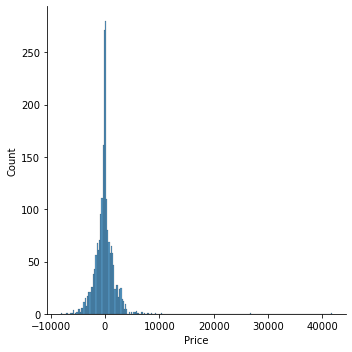

In [263]:
plt.figure(figsize =(8,8))
sns.displot(y_test-prediction)
plt.show()

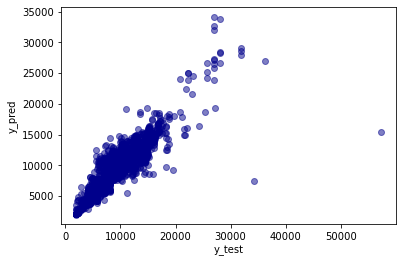

In [264]:
plt.scatter(y_test,prediction,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [269]:

print("MAE:" , metrics.mean_absolute_error(y_test,prediction))
print("MSE:" , metrics.mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1161.670461495606
MSE: 3944379.9935044115
RMSE: 1986.046322094329


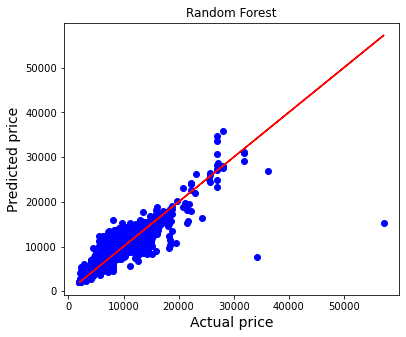

In [268]:
plt.figure(figsize=(6,5))
plt.scatter(y_test,y_pred,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual price", fontsize=14)
plt.ylabel("Predicted price", fontsize=14)
plt.title("Random Forest")
plt.show()

Thus we can see that most of the data points are are close the best fit showing the best fit model. For the Random Forest Regressor model.

In [ ]:
#Saving the Model

In [ ]:
import pickle

In [271]:
# open a file, where you ant to store the data
filename = open('flight_rfr.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, filename)

In [272]:
model = open('flight_rfr.pkl','rb')
forest = pickle.load(model)

In [273]:
y_prediction =forest.predict(x_test)

In [274]:
metrics.r2_score(y_test,y_prediction)

0.817068468136573

Taking randomForestRegressor as best fit model

# Test Dataset

In [275]:
# Setting Test dataset
test=pd.read_csv("flight_Test.csv")

In [276]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [277]:
test.shape # checking no. of columns & rows

(2671, 10)

In [278]:
test.columns #print all columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [279]:
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

Here we can see that all columns are of object type.

In [280]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Here we can see that in flight test dataset there are total 10 columns and 2671 rows. 

In [281]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Thus in this dataset there are no null values.

# EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air Asia'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'SpiceJet'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'GoAir'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Jet Airways Business')])

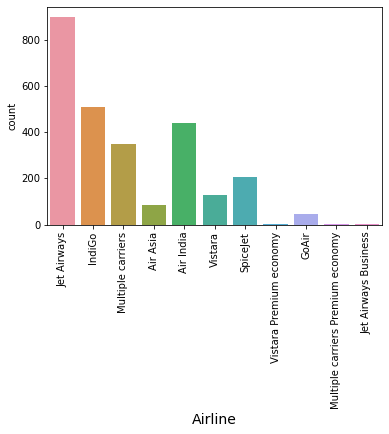

In [282]:
plt.figure(figsize=(6,4))
sns.countplot(x='Airline', data=test)
plt.xlabel('Airline', fontsize=14)
plt.xticks(rotation=90)

Here we can see that there are Jet Airways have more number of flights.After this Indigo and 'Air India'. Least no. of flights are Multiple carrier Premium Economy, Jet Airways Business, Vistara Premium economy.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Banglore'),
  Text(3, 0, 'Mumbai'),
  Text(4, 0, 'Chennai')])

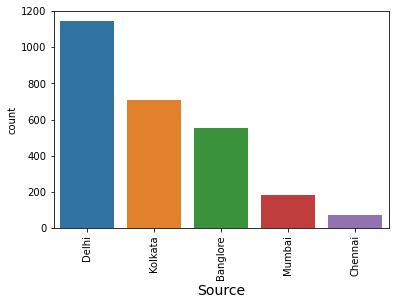

In [283]:
plt.figure(figsize=(6,4))
sns.countplot(x='Source', data=test)
plt.xlabel('Source', fontsize=14)
plt.xticks(rotation=90)

Here we can see that no. of flights are maximum in Delhi city then Kolkata. Least no. is in Chennai

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Cochin'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'New Delhi'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Kolkata')])

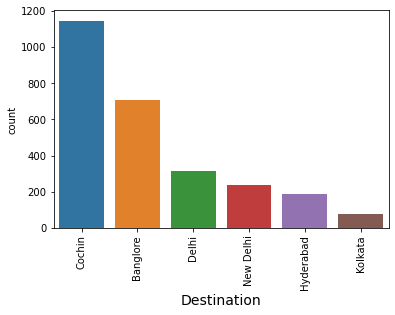

In [284]:
plt.figure(figsize=(6,4))
sns.countplot(x='Destination', data=test)
plt.xlabel('Destination', fontsize=14)
plt.xticks(rotation=90)

From above graph we can see that cochin as destination have max and Kolkata as min no. of flights.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1 stop'),
  Text(1, 0, 'non-stop'),
  Text(2, 0, '2 stops'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

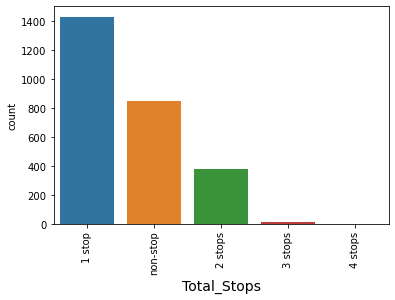

In [285]:
plt.figure(figsize=(6,4))
sns.countplot(x='Total_Stops', data=test)
plt.xlabel('Total_Stops', fontsize=14)
plt.xticks(rotation=90)

As we can see from above graph that flights with 1 stop are maximum and least with 4 stops

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Long layover'),
  Text(4, 0, 'Business class'),
  Text(5, 0, 'Change airports')])

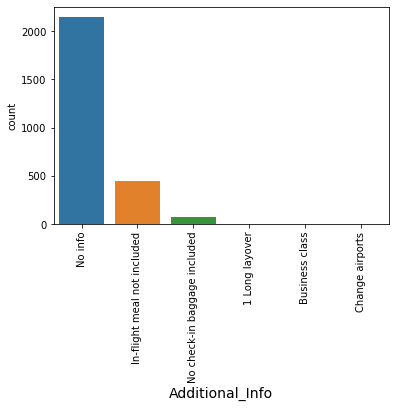

In [286]:
plt.figure(figsize=(6,4))
sns.countplot(x='Additional_Info', data=test)
plt.xlabel('Additional_Info', fontsize=14)
plt.xticks(rotation=90)

From above graph we can see that flights with additional info of 'No_info' are more than any other information available.

# Data Preprocessing

In [287]:
test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


Now we are working on all columns except target to convert it into numeric values.

In [288]:
#Date_of_journey

In [289]:
test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [290]:
# Dep_Time
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [291]:
# Arrival_Time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [292]:
#Duration
test['Duration']=test['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
#now lets convert this column into a numeric
test['Duration']=pd.to_numeric(test['Duration'])

In [293]:
from sklearn.preprocessing import LabelEncoder
columns = ['Airline','Source','Destination','Total_Stops']
le = LabelEncoder()
for i in columns:
    test[i] = le.fit_transform(test[i])

In [294]:
#Route
test.drop(["Route"], axis = 1, inplace = True)

In [295]:
#Total Stops
test["Total_Stops"].value_counts() #checking counts of unique values

0    1431
4     849
1     379
2      11
3       1
Name: Total_Stops, dtype: int64

In [296]:
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [297]:
#Additional_info
test.drop(["Additional_Info"], axis = 1, inplace = True)

In [298]:
test.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,655,0,6,6,17,30,4,25
1,3,3,0,240,0,12,5,6,20,10,20
2,4,2,1,1425,0,21,5,19,15,19,0
3,6,2,1,780,0,21,5,8,0,21,0
4,0,0,2,170,4,24,6,23,55,2,45
5,4,2,1,1100,0,12,6,18,15,12,35
6,1,0,5,905,0,12,3,7,30,22,35
7,3,3,0,315,0,1,5,15,15,20,30
8,3,3,0,165,4,15,3,10,10,12,55
9,4,3,0,365,0,18,5,16,30,22,35


Now test dataset is ready to use, as the columns are now in numerics.

# Load the Model

In [299]:
fitted_model=pickle.load(open("flight_rfr.pkl","rb"))

In [300]:
fitted_model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

# Using Test Dataset

In [301]:
#prediction over test dataset

In [303]:
predictions=fitted_model.predict(test)
predictions

array([11642.95005424,  4334.20201793, 14765.6769707 , ...,
       15403.84295362, 13472.82983929,  7924.46726863])

Conclusion: Thus prediction over test dataset is done.